In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from def_functions import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
scores=load_data('赛题1数据集/企业评分.xlsx')

In [5]:
train_remain_bond=pd.read_csv('data/train_remain_bond0422.csv')
train_remain_finance=pd.read_csv('data/train_remain_finance0422.csv')
train_remain_land=pd.read_csv('data/train_remain_land0422.csv')
train_remain_credit=pd.read_csv('data/train_remain_credit0422.csv')
train_remain_compete=pd.read_csv('data/train_remain_compete0422.csv')
test_remain_bond=pd.read_csv('data/test_remain_bond0422.csv')
test_remain_finance=pd.read_csv('data/test_remain_finance0422.csv')
test_remain_land=pd.read_csv('data/test_remain_land0422.csv')
test_remain_credit=pd.read_csv('data/test_remain_credit0422.csv')
test_remain_compete=pd.read_csv('data/test_remain_compete0422.csv')

In [6]:
remain_bond=pd.concat([train_remain_bond,test_remain_bond]).reset_index(drop=True)
remain_finance=pd.concat([train_remain_finance,test_remain_finance]).reset_index(drop=True)
remain_land=pd.concat([train_remain_land,test_remain_land]).reset_index(drop=True)
remain_credit=pd.concat([train_remain_credit,test_remain_credit]).reset_index(drop=True)
remain_compete=pd.concat([train_remain_compete,test_remain_compete]).reset_index(drop=True)

bond with scores:

In [7]:
bond_scores=pd.merge(remain_bond,scores,on='企业编号',how='inner')

In [8]:
bond_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 4 columns):
企业编号     2345 non-null int64
债券品种     2345 non-null object
付息方式     2345 non-null object
企业总评分    2345 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 91.6+ KB


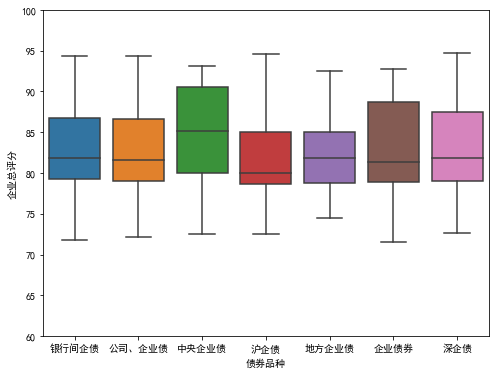

In [9]:
var='债券品种'
data = pd.concat([bond_scores['企业总评分'], bond_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

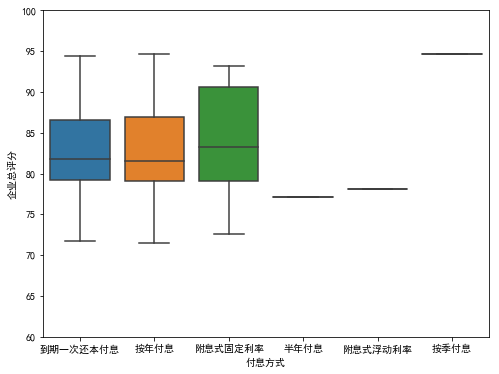

In [9]:
var='付息方式'
data = pd.concat([bond_scores['企业总评分'], bond_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [10]:
drop_values=['半年付息','附息式浮动利率','按季付息']
remain_bond=remain_bond[~remain_bond['付息方式'].isin(drop_values)]
bond_scores=bond_scores[~bond_scores['付息方式'].isin(drop_values)]

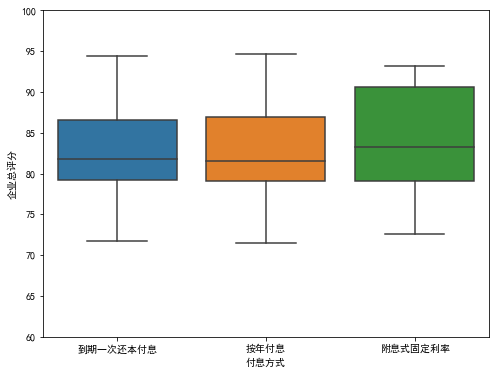

In [11]:
var='付息方式'
data = pd.concat([bond_scores['企业总评分'], bond_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [12]:
remain_bond=remain_bond.reset_index(drop=True)

finance with scores

In [13]:
finance_scores=pd.merge(remain_finance,scores,on='企业编号',how='inner')

In [14]:
finance_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 4427
Data columns (total 3 columns):
企业编号     4428 non-null int64
轮次       4428 non-null object
企业总评分    4428 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 138.4+ KB


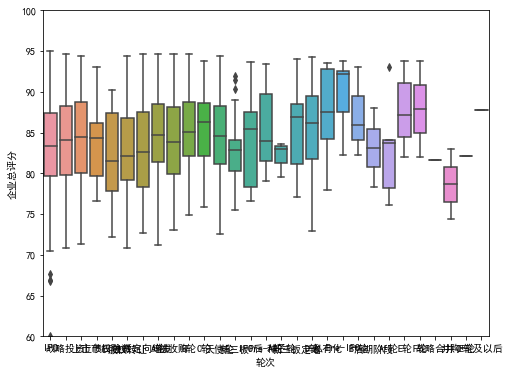

In [15]:
var='轮次'
data = pd.concat([finance_scores['企业总评分'], finance_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [16]:
land_scores=pd.merge(remain_land,scores,on='企业编号',how='inner')

In [17]:
land_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31723 entries, 0 to 31722
Data columns (total 3 columns):
企业编号     31723 non-null int64
土地用途     31716 non-null object
企业总评分    31723 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 991.3+ KB


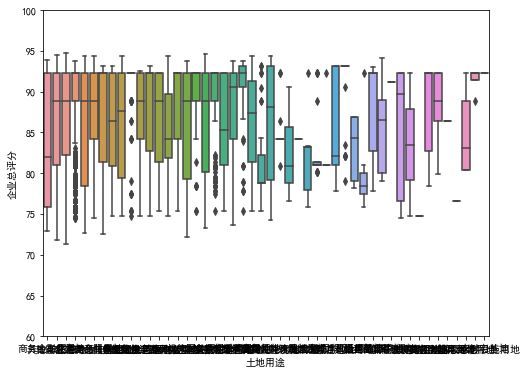

In [18]:
var='土地用途'
data = pd.concat([land_scores['企业总评分'], land_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [19]:
compete_scores=pd.merge(remain_compete,scores,on='企业编号',how='inner')

In [20]:
compete_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32244 entries, 0 to 32243
Data columns (total 4 columns):
企业编号      32244 non-null int64
竞品运营状态    29916 non-null object
竞品的标签     32244 non-null object
企业总评分     32244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


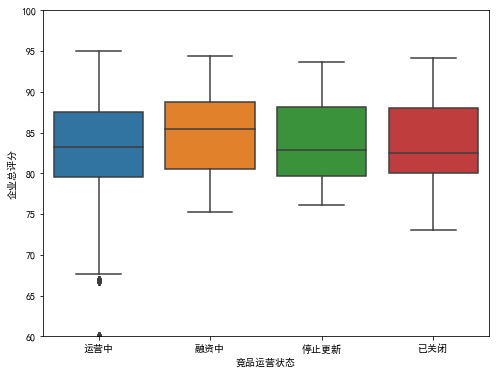

In [21]:
var='竞品运营状态'
data = pd.concat([compete_scores['企业总评分'], compete_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

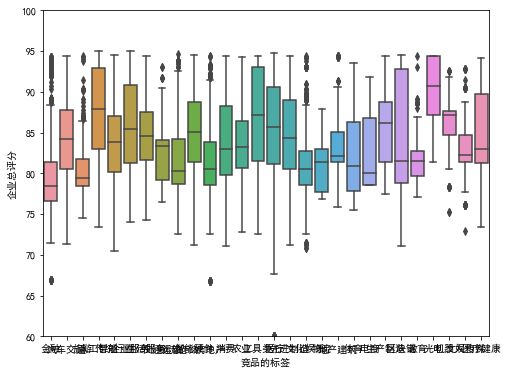

In [22]:
var='竞品的标签'
data = pd.concat([compete_scores['企业总评分'], compete_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [23]:
remain_bond=pd.get_dummies(remain_bond).groupby('企业编号',as_index=False).sum()
remain_finance=pd.get_dummies(remain_finance).groupby('企业编号',as_index=False).sum()
remain_land=pd.get_dummies(remain_land).groupby('企业编号',as_index=False).sum()
remain_compete=pd.get_dummies(remain_compete).groupby('企业编号',as_index=False).sum()

In [24]:
remain_bond.head()

,企业编号,债券品种_中央企业债,债券品种_企业债券,债券品种_公司、企业债,债券品种_地方企业债,债券品种_沪企债,债券品种_深企债,债券品种_银行间企债,付息方式_到期一次还本付息,付息方式_按年付息,付息方式_附息式固定利率
0,1002,0,0,0,0,0,0,6,6,0,0
1,1004,1,0,2,0,0,0,2,1,3,1
2,1005,0,0,1,0,0,0,8,3,6,0
3,1006,0,0,0,0,0,0,1,0,1,0
4,1007,0,0,0,0,2,0,1,0,3,0


In [25]:
def convert_values_to_one(value):
    if value>0:
        value=value/value
    return int(value)

In [26]:
for i in remain_bond.columns[1:]:
    remain_bond[i]=remain_bond[i].apply(convert_values_to_one)

In [27]:
remain_bond.head()

,企业编号,债券品种_中央企业债,债券品种_企业债券,债券品种_公司、企业债,债券品种_地方企业债,债券品种_沪企债,债券品种_深企债,债券品种_银行间企债,付息方式_到期一次还本付息,付息方式_按年付息,付息方式_附息式固定利率
0,1002,0,0,0,0,0,0,1,1,0,0
1,1004,1,0,1,0,0,0,1,1,1,1
2,1005,0,0,1,0,0,0,1,1,1,0
3,1006,0,0,0,0,0,0,1,0,1,0
4,1007,0,0,0,0,1,0,1,0,1,0


In [28]:
for i in remain_finance.columns[1:]:
    remain_finance[i]=remain_finance[i].apply(convert_values_to_one)
for i in remain_land.columns[1:]:
    remain_land[i]=remain_land[i].apply(convert_values_to_one)
for i in remain_compete.columns[1:]:
    remain_compete[i]=remain_compete[i].apply(convert_values_to_one)

In [29]:
remain_finance.head()

,企业编号,轮次_A+轮,轮次_A轮,轮次_B+轮,轮次_B轮,轮次_C+轮,轮次_C轮,轮次_D轮,轮次_E轮,轮次_E轮及以后,...,轮次_天使轮,轮次_并购,轮次_战略合并,轮次_战略投资,轮次_新三板,轮次_新三板定增,轮次_私有化,轮次_种子轮,轮次_股权转让,轮次_被收购
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
remain_land.head()

,企业编号,土地用途_中低价位、中小套型普通商品住房用地,土地用途_交通运输用地,土地用途_仓储用地,土地用途_住宅用地,土地用途_住宿餐饮用地,土地用途_公共租赁住房用地,土地用途_公共管理与公共服务用地,土地用途_公共设施用地,土地用途_公园与绿地,...,土地用途_科教用地,土地用途_空闲地,土地用途_管道运输用地,土地用途_经济适用住房用地,土地用途_街巷用地,土地用途_设施农用地,土地用途_采矿用地,土地用途_铁路用地,土地用途_风景名胜设施用地,土地用途_高档住宅用地
0,1001,1,1,1,1,1,0,1,0,0,...,1,1,0,1,0,0,1,0,0,1
1,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
remain_compete.head()

,企业编号,竞品运营状态_停止更新,竞品运营状态_已关闭,竞品运营状态_融资中,竞品运营状态_运营中,竞品的标签_交通运输,竞品的标签_人工智能,竞品的标签_企业服务,竞品的标签_传统行业,竞品的标签_体育,...,竞品的标签_智能硬件,竞品的标签_机器人,竞品的标签_汽车交通,竞品的标签_消费,竞品的标签_物流,竞品的标签_物流仓储,竞品的标签_生产制造,竞品的标签_生活服务,竞品的标签_电商,竞品的标签_金融
0,1001,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1002,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1004,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1005,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
missing_data=missing_values_table(remain_compete)
missing_data.head(10)

,Missing Values,percent of Total Values


In [33]:
missing_data=missing_values_table(remain_land)
missing_data.head(10)

,Missing Values,percent of Total Values


In [34]:
missing_data=missing_values_table(remain_bond)
missing_data.head(10)

,Missing Values,percent of Total Values


In [35]:
missing_data=missing_values_table(remain_finance)
missing_data.head(10)

,Missing Values,percent of Total Values


In [36]:
missing_data=missing_values_table(remain_credit)
missing_data.head(10)

,Missing Values,percent of Total Values
信用等级,1522,0.479672


In [37]:
remain_credit.replace('0000000001',np.nan,inplace=True)
remain_credit['信用等级']=remain_credit['信用等级'].fillna(remain_credit['信用等级'].mode()[0])

In [38]:
missing_data=missing_values_table(remain_credit)
missing_data.head(10)

,Missing Values,percent of Total Values


In [39]:
missing_data=missing_values_table(remain_bond)
missing_data.head(10)

,Missing Values,percent of Total Values


In [40]:
credit_scores=pd.merge(remain_credit,scores,on='企业编号',how='inner')

In [41]:
credit_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2586
Data columns (total 3 columns):
企业编号     2587 non-null int64
信用等级     2587 non-null object
企业总评分    2587 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 80.8+ KB


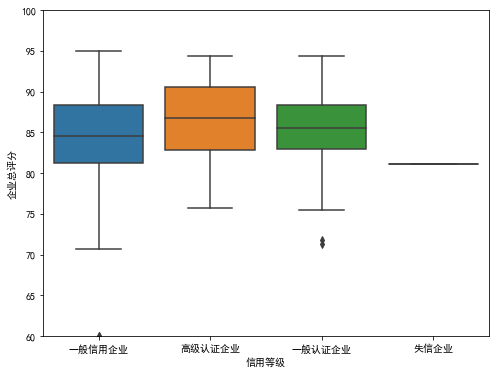

In [42]:
var='信用等级'
data = pd.concat([credit_scores['企业总评分'], credit_scores[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="企业总评分", data=data)
fig.axis(ymin=60, ymax=100);

In [43]:
remain_credit=pd.get_dummies(remain_credit).groupby('企业编号',as_index=False).sum()

In [44]:
for i in remain_credit.columns[1:]:
    remain_credit[i]=remain_credit[i].apply(convert_values_to_one)

In [45]:
remain_credit.head()

,企业编号,信用等级_一般信用企业,信用等级_一般认证企业,信用等级_失信企业,信用等级_高级认证企业
0,1001,1,0,0,0
1,1002,1,0,0,0
2,1003,1,0,0,0
3,1004,1,0,0,0
4,1006,1,0,0,0


In [46]:
remain_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 0 to 2532
Data columns (total 5 columns):
企业编号           2533 non-null int64
信用等级_一般信用企业    2533 non-null int64
信用等级_一般认证企业    2533 non-null int64
信用等级_失信企业      2533 non-null int64
信用等级_高级认证企业    2533 non-null int64
dtypes: int64(5)
memory usage: 118.7 KB


In [47]:
train_word_features=[remain_credit[remain_credit['企业编号']<4001],remain_bond[remain_bond['企业编号']<4001],\
remain_compete[remain_compete['企业编号']<4001],remain_finance[remain_finance['企业编号']<4001],\
remain_land[remain_land['企业编号']<4001]]

In [48]:
test_word_features=[remain_credit[remain_credit['企业编号']>=4001],remain_bond[remain_bond['企业编号']>=4001],\
remain_compete[remain_compete['企业编号']>=4001],remain_finance[remain_finance['企业编号']>=4001],\
remain_land[remain_land['企业编号']>=4001]]

In [49]:
data=np.arange(1001,4001)
train_word_data = pd.DataFrame(data,columns=['企业编号'])
for i in range(len(train_word_features)):
    train_word_data=pd.merge(train_word_data,train_word_features[i],on='企业编号',how='outer')

In [50]:
test_word_data=load_data('企业编号.xlsx')
for i in range(len(test_word_features)):
    test_word_data=pd.merge(test_word_data,test_word_features[i],on='企业编号',how='outer')

In [51]:
train_word_data.shape

(3000, 124)

In [52]:
test_word_data.shape

(552, 124)

In [57]:
train_word_data.to_csv("data/train_word_0422.csv",index=False,na_rep="NULL",encoding='utf_8_sig')
test_word_data.to_csv("data/test_word_0422.csv",index=False,na_rep="NULL",encoding='utf_8_sig')